# 2. Project1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자

### (1) 데이터 가져오기

In [153]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes=load_diabetes()

df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [154]:
df_y = pd.DataFrame(diabetes.target)
df_y

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


### (2) 모델에서 입력할 데이터 X 와 예측할 데이터 y 준비하기

In [155]:
import numpy as np

X = np.array(df_X)
y = np.array(df_y[0])

#### df_y[0]으로 안하고 df_y로 하면 아래와 같이 하나의 행으로 되어 있지 않고 열로 형성되어 수정하였다.

In [156]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [157]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

### (3) train 데이터와 test 데이터로 분리하기

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [159]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### (4) 모델 준비하기

In [180]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

In [181]:
W

array([0.39178272, 0.52733943, 0.12272595, 0.47059746, 0.03069718,
       0.56555247, 0.38592947, 0.31235591, 0.49522981, 0.04050909])

In [182]:
b

0.9851718918124838

In [187]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

### (5) 손실함수 loss  정의하기

In [188]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [189]:
def loss(x, W, b, y):
    predictions = model(x, W, b)
    L = MSE(predictions, y)
    return L

### (6) 기울기는 구하는 gradient 함수 구현하기

In [190]:
def gradient(X, W, b, y):
    
    N = len(W)
    
    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)
           
    db = 2 * (y_pred - y).mean()
    return dW, db

In [191]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.64123103  -13.77476925 -189.72553768 -142.72589084  -68.39873289
  -56.12226333  127.72480646 -139.14319163 -182.99291254 -123.65874955]
db: -302.29662454216685


### (7) 하이퍼 파라미터인 학습률 설정하기

In [192]:
LEARNING_RATE = 0.0001

In [193]:
losses = []

for i in range(1, 1001):
    dW, db =gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f'%(i, L))    

Iteration 10 : Loss 23015.3384
Iteration 20 : Loss 18539.3144
Iteration 30 : Loss 15165.3980
Iteration 40 : Loss 12620.7386
Iteration 50 : Loss 10700.0682
Iteration 60 : Loss 9248.9608
Iteration 70 : Loss 8151.2386
Iteration 80 : Loss 7319.4982
Iteration 90 : Loss 6687.9828
Iteration 100 : Loss 6207.2203
Iteration 110 : Loss 5839.9898
Iteration 120 : Loss 5558.2868
Iteration 130 : Loss 5341.0405
Iteration 140 : Loss 5172.3965
Iteration 150 : Loss 5040.4242
Iteration 160 : Loss 4936.1457
Iteration 170 : Loss 4852.8039
Iteration 180 : Loss 4785.3128
Iteration 190 : Loss 4729.8434
Iteration 200 : Loss 4683.5127
Iteration 210 : Loss 4644.1492
Iteration 220 : Loss 4610.1169
Iteration 230 : Loss 4580.1825
Iteration 240 : Loss 4553.4160
Iteration 250 : Loss 4529.1156
Iteration 260 : Loss 4506.7508
Iteration 270 : Loss 4485.9208
Iteration 280 : Loss 4466.3218
Iteration 290 : Loss 4447.7232
Iteration 300 : Loss 4429.9497
Iteration 310 : Loss 4412.8674
Iteration 320 : Loss 4396.3739
Iteration 33

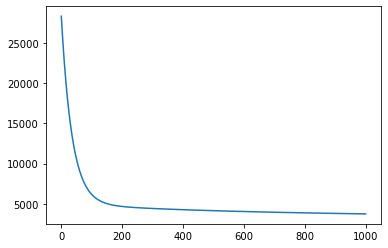

In [194]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

### pandas 데이터를 array로 바꾸어 사용하여 train 데이타와 test데이터로 분리할 수 있었습니다. LEARNING_RATE가 0.001 이상인 경우 loss 가 가장 작은 값을 갖는다. 
### 가중치 W 와 b의 값이 매우 중요할 변수로서 계산을 좀 더 정확하고 빠른 계산을 위해 실제 데이터와 유사한 값을 가지도록 하는 고민할 생각이다. 

### (9) 모델 학습하기

In [32]:
W, b

(array([ 14.67770802, -20.59634554, 135.16203453,  87.0872041 ,
        -37.98202591, -17.4520062 , -22.05393549,  53.71717121,
        109.43906574,  41.67139382]),
 4.506798869044753)

In [33]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2897.0803085866037

### (10) 정답 데이터와 예측한 데이터 시각화하기

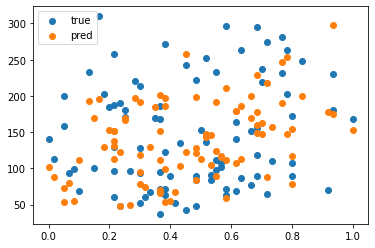

In [34]:
plt.scatter(X_test[:, 0], y_test, label ="true")
plt.scatter(X_test[:, 0], prediction, label = "pred")
plt.legend()
plt.show()

# 2. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

### (1) 데이터 가져오기

In [231]:
import pandas as pd
import numpy as np
import datetime

bicycle_man = pd.read_csv("train.csv")
bicycle_man

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### datetime - hourly date + timestamp
### season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
### holiday - whether the day is considered a holiday 
### workingday - whether the day is neither a weekend nor holiday
### weather 
    1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scatteredclouds 
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
### temp - temperature in Celsius
### atemp - "feels like" temperature in Celsius
### humidity - relative humidity
### windspeed - wind speed
### casual - number of non-registered user rentals initiated
### registered - number of registered user rentals initiated
### count - number of total rentals

### (2) datetiem 컬럼을 datetiem 자료형으로 변환하고, 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [232]:
bicycle_man['datetime'] = pd.to_datetime(bicycle_man['datetime'])
bicycle_man

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [233]:
bicycle_man['Year'] = bicycle_man['datetime'].dt.year
bicycle_man['Month'] = bicycle_man['datetime'].dt.month
bicycle_man['Day'] = bicycle_man['datetime'].dt.day
bicycle_man['Hour'] = bicycle_man['datetime'].dt.hour
bicycle_man['Minute'] = bicycle_man['datetime'].dt.minute
bicycle_man['Second'] = bicycle_man['datetime'].dt.second

In [234]:
bicycle_man.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day,Hour,Minute,Second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

Text(0.5, 0, 'Second')

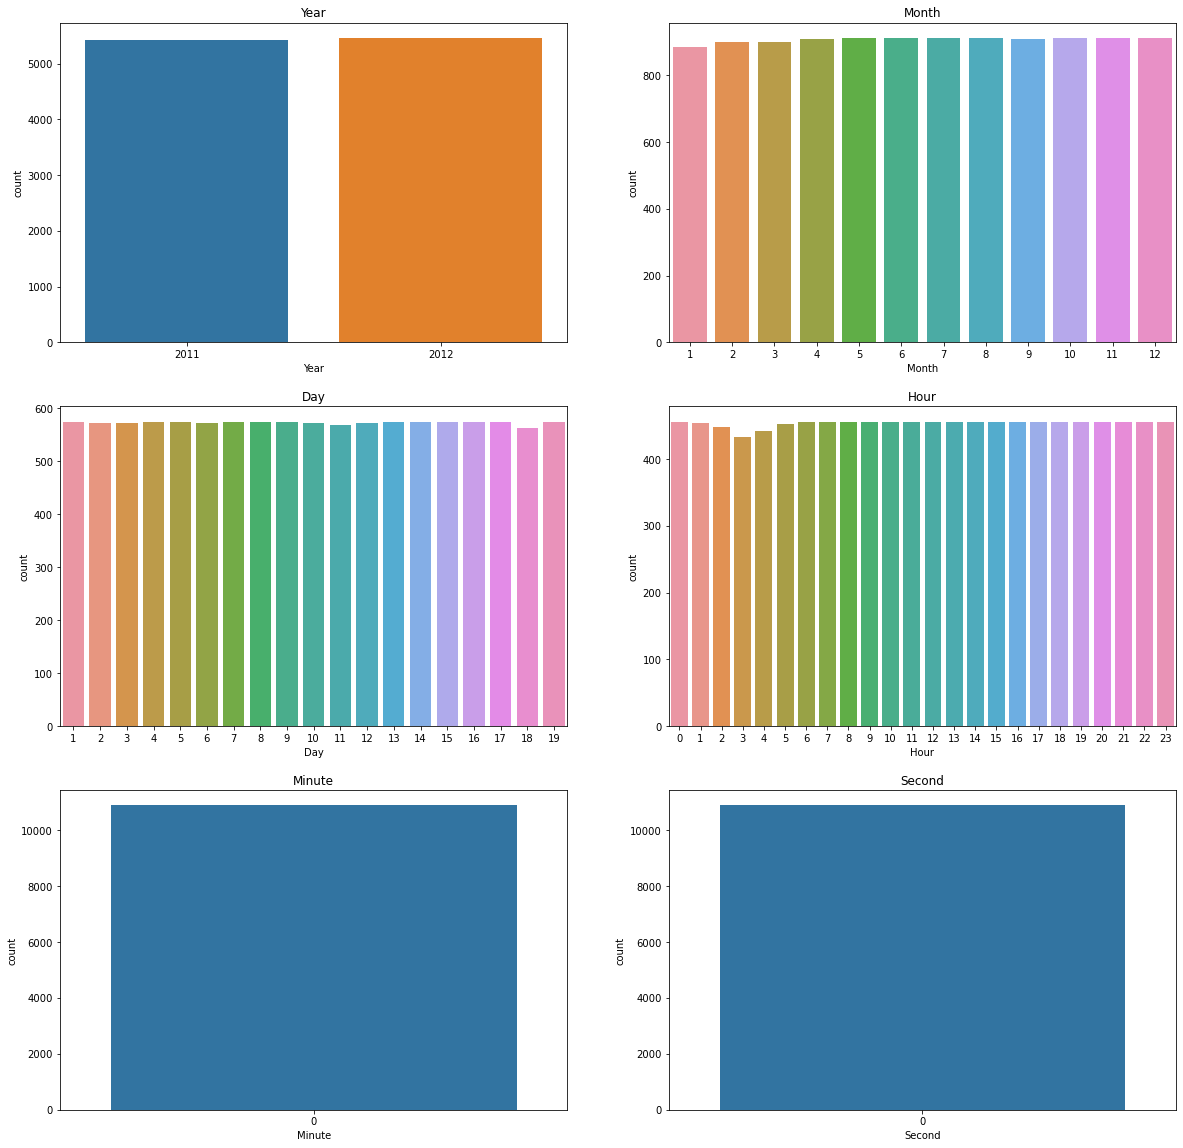

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
sns.countplot(x ='Year', data = bicycle_man)
plt.title('Year')
plt.xlabel('Year')

plt.subplot(3, 2, 2)
sns.countplot(x ='Month', data = bicycle_man)
plt.title('Month')
plt.xlabel('Month')

plt.subplot(3, 2, 3)
sns.countplot(x ='Day', data = bicycle_man)
plt.title('Day')
plt.xlabel('Day')

plt.subplot(3, 2, 4)
sns.countplot(x ='Hour', data = bicycle_man)
plt.title('Hour')
plt.xlabel('Hour')

plt.subplot(3, 2, 5)
sns.countplot(x ='Minute', data = bicycle_man)
plt.title('Minute')
plt.xlabel('Minute')

plt.subplot(3, 2, 6)
sns.countplot(x ='Second', data = bicycle_man)
plt.title('Second')
plt.xlabel('Second')

### (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [236]:
df_X = bicycle_man.drop(['datetime', 'count', 'Minute', 'Second', 'holiday'], axis =1)
df_y = bicycle_man['count']

In [237]:
X = np.array(df_X)
y = np.array(df_y)

In [238]:
X

array([[ 1.,  0.,  1., ...,  1.,  1.,  0.],
       [ 1.,  0.,  1., ...,  1.,  1.,  1.],
       [ 1.,  0.,  1., ...,  1.,  1.,  2.],
       ...,
       [ 4.,  1.,  1., ..., 12., 19., 21.],
       [ 4.,  1.,  1., ..., 12., 19., 22.],
       [ 4.,  1.,  1., ..., 12., 19., 23.]])

In [239]:
y

array([ 16,  40,  32, ..., 168, 129,  88], dtype=int64)

In [240]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 13) (8708,)
(2178, 13) (2178,)


### (5) LinearRegression 모델 학습

In [241]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [242]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [243]:
# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logistic_model = LogisticRegression(max_iter = 2000) 

print(logistic_model._estimator_type)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(logistic_model.score(X_train, y_train))
print(logistic_model.score(X_test, y_test))

classifier
0.031809830041341296
0.02295684113865932


In [209]:
X

array([[ 1.,  0.,  1., ...,  1.,  1.,  0.],
       [ 1.,  0.,  1., ...,  1.,  1.,  1.],
       [ 1.,  0.,  1., ...,  1.,  1.,  2.],
       ...,
       [ 4.,  1.,  1., ..., 12., 19., 21.],
       [ 4.,  1.,  1., ..., 12., 19., 22.],
       [ 4.,  1.,  1., ..., 12., 19., 23.]])

In [210]:
y

array([ 16,  40,  32, ..., 168, 129,  88], dtype=int64)

In [211]:
W

array([34.88011366, -2.27625835, 61.25670532, 54.11799639, 22.92671597,
       20.97167843, 10.88971728, 34.70095638, 60.8163725 , 48.77694198])

In [212]:
b

3.3512880853648293

### 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [213]:
import numpy as np
W = np.random.rand(13)
b = np.random.rand()

In [214]:
def model(X, W, b):
    predictions = 0
    for i in range(13):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [215]:
def loss(x, W, b, y):
    predictions = model(x, W, b)
    L = MSE(predictions, y)
    return L

In [216]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [217]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [218]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
#     print(y)
       # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
           
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [219]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)
len(dW)

dW: [5.31357259e+06 1.44436706e+06 3.03289199e+06 4.27167865e+07
 4.99780355e+07 1.32808349e+08 2.71013241e+07 7.21028847e+07
 3.09203506e+08 4.27600001e+09 1.38162283e+07 2.12667314e+07
 2.41554754e+07]
db: 2538.599923820625


13

In [252]:
LEARNING_RATE = 0.0000001

In [251]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f'%(i, L))    

Iteration 10 : Loss nan
Iteration 20 : Loss nan
Iteration 30 : Loss nan
Iteration 40 : Loss nan
Iteration 50 : Loss nan
Iteration 60 : Loss nan
Iteration 70 : Loss nan
Iteration 80 : Loss nan
Iteration 90 : Loss nan
Iteration 100 : Loss nan
Iteration 110 : Loss nan
Iteration 120 : Loss nan
Iteration 130 : Loss nan
Iteration 140 : Loss nan
Iteration 150 : Loss nan
Iteration 160 : Loss nan
Iteration 170 : Loss nan
Iteration 180 : Loss nan
Iteration 190 : Loss nan
Iteration 200 : Loss nan
Iteration 210 : Loss nan
Iteration 220 : Loss nan
Iteration 230 : Loss nan
Iteration 240 : Loss nan
Iteration 250 : Loss nan
Iteration 260 : Loss nan
Iteration 270 : Loss nan
Iteration 280 : Loss nan
Iteration 290 : Loss nan
Iteration 300 : Loss nan
Iteration 310 : Loss nan
Iteration 320 : Loss nan
Iteration 330 : Loss nan
Iteration 340 : Loss nan
Iteration 350 : Loss nan
Iteration 360 : Loss nan
Iteration 370 : Loss nan
Iteration 380 : Loss nan
Iteration 390 : Loss nan
Iteration 400 : Loss nan
Iteration

### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

AttributeError: 'numpy.ndarray' object has no attribute 'get'

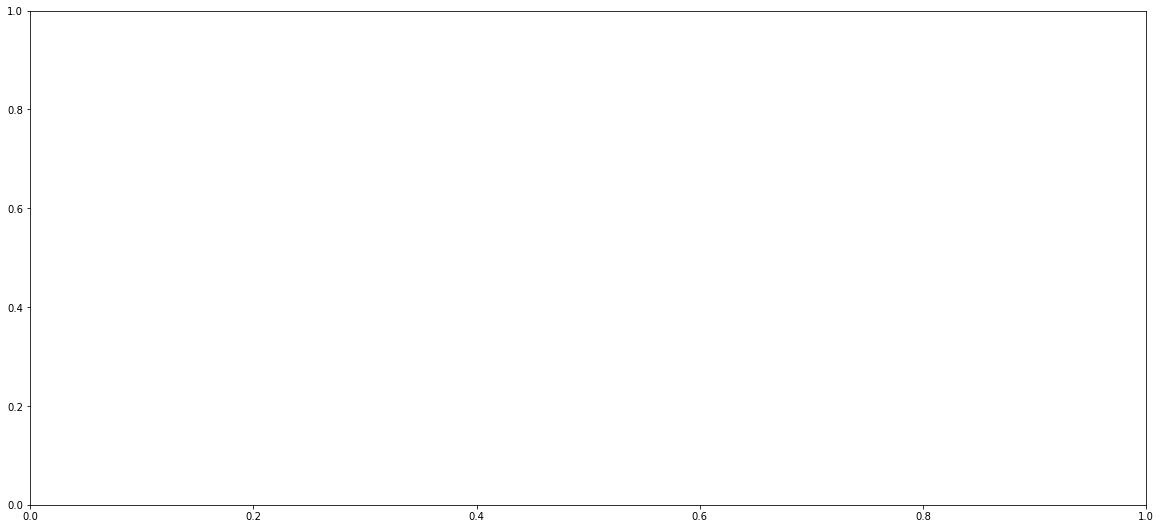

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

plt.subplot(2, 1, 1)
sns.countplot(x ='temp', data = y_pred)
plt.title('Count about Temperature')
plt.xlabel('Temperature')

plt.subplot(2, 1, 2)
sns.countplot(x ='humidity', data = y_pred)
plt.title('Count about Humidity')
plt.xlabel('Humidity')